In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [13]:



def add_derivatives(df, cols = ["x", "y"]):
    dt = (df["datetime"] - df["datetime"].shift()).median().delta*1e-9
    for col in cols:
        df = append_derivatives_to_dataframe(df, col, dt=dt, window_length=31, polyorder=3)
    return df

def read_txt(file):
    df = pd.read_csv(file, sep="\t", header=None)

    file_break_indexes = list(df[df[0]=="waveform"].index) + [df.index.max()]

    files = []
    for i in range(len(file_break_indexes) - 1):
        file = df.loc[file_break_indexes[i]:file_break_indexes[i+1]]
        file.columns = file.iloc[0]
        file = file.drop(file.index[0])
        file = file.iloc[:-1].dropna(how="all")
        files.append(file)
    return files

file = "amb_other/sweep_fx_4to69Hz_1seg_0RPM.txt"
files = read_txt(file)
file = "amb_other/sweep_fy_4to69Hz_1seg_0RPM.txt"
files.extend(read_txt(file))
print(len(files))

dfs = []
for df in files:    
    df = df.iloc[3:]
    old_cols = ["waveform", "Pos_Ax [um]", "Pos_Ay [um]", "Pos_Bx [um]", "Pos_By [um]", "F_Ax [N]",
                "F_Ay [N]", "F_Bx [N]", "F_By [N]", "Ex_Ax", "Ex_Ay", 'Ex_Bx', "Ex_By"]
    new_cols = ["datetime", "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]
    df = df[old_cols]
    df.rename(columns = dict(zip(old_cols, new_cols)), inplace=True)
    df["datetime"] = df["datetime"].apply(pd.to_datetime)

    def to_float(x):
        if not isinstance(x, str):
            return x
        return float(x.replace(",", "."))

    for col in [ "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by", "e_ax", "e_ay", "e_bx", "e_by"]:
        df[col] = df[col].apply(to_float)

    df = df.drop(df[pd.isnull(df["datetime"])].index)
    
    dfs.append(df)

    



#dfs = list(map(add_derivatives, dfs))

4


In [14]:
dfs[0]

,datetime,ax,ay,bx,by,f_ax,f_ay,f_bx,f_by,e_ax,e_ay,e_bx,e_by
4,2019-03-24 02:00:56.426152,0.000057,-6.046206e-07,-0.000023,2.091979e-07,0.121782,1.582178,1.513651,1.640777,-1.282401,-0.000161,-1.282396,0.002834
5,2019-03-24 02:00:56.426348,0.000056,-1.222993e-06,-0.000025,7.321728e-07,-0.041696,1.034547,1.628579,1.315257,-1.287103,-0.000191,-1.287032,0.002790
6,2019-03-24 02:00:56.426543,0.000054,-8.348276e-07,-0.000027,8.366775e-07,0.075916,1.150161,1.480513,1.638755,-1.290811,-0.000234,-1.290556,0.002867
7,2019-03-24 02:00:56.426738,0.000052,-7.583163e-07,-0.000029,1.166217e-06,0.079873,1.602477,1.612271,1.552258,-1.293661,-0.000269,-1.293382,0.002929
8,2019-03-24 02:00:56.426934,0.000050,-1.023525e-06,-0.000031,1.189240e-06,0.257520,1.077898,1.589085,1.409124,-1.295543,-0.000225,-1.295577,0.002818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71691,2019-03-24 02:01:10.425176,0.000063,-1.478106e-06,-0.000012,-6.057924e-06,0.387652,1.352104,1.223962,1.957098,-1.238735,-0.000309,-1.238759,0.002998
71692,2019-03-24 02:01:10.425371,0.000061,-1.314313e-06,-0.000014,-5.634488e-06,0.191125,1.267192,1.089709,1.602899,-1.248537,-0.000236,-1.248897,0.002910
71693,2019-03-24 02:01:10.425566,0.000060,-1.746232e-06,-0.000015,-5.034319e-06,0.307673,1.054335,1.243467,1.500542,-1.257511,-0.000299,-1.257612,0.002885
71694,2019-03-24 02:01:10.425762,0.000058,-1.210428e-06,-0.000017,-4.629618e-06,0.068701,1.215885,1.772341,1.791563,-1.265565,-0.000251,-1.265559,0.002917


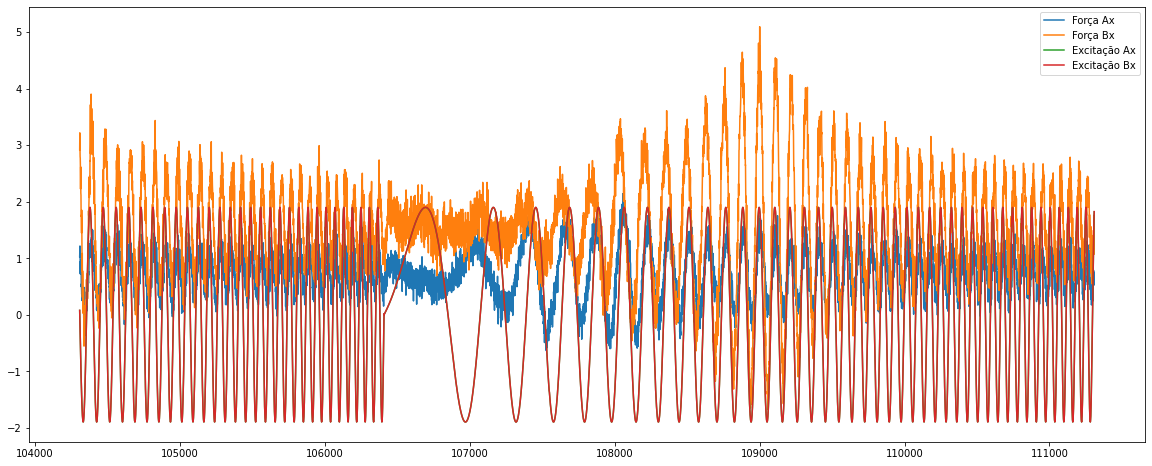

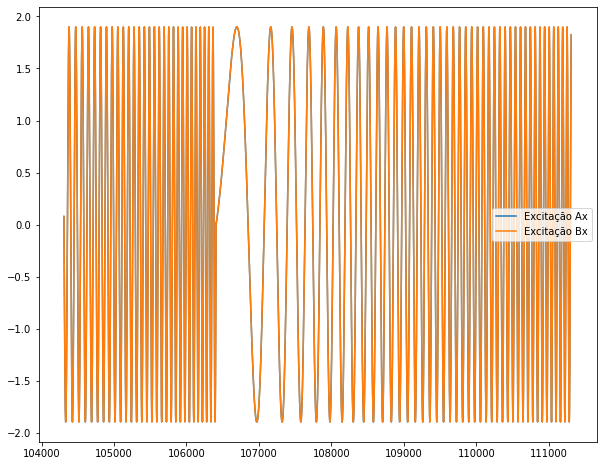

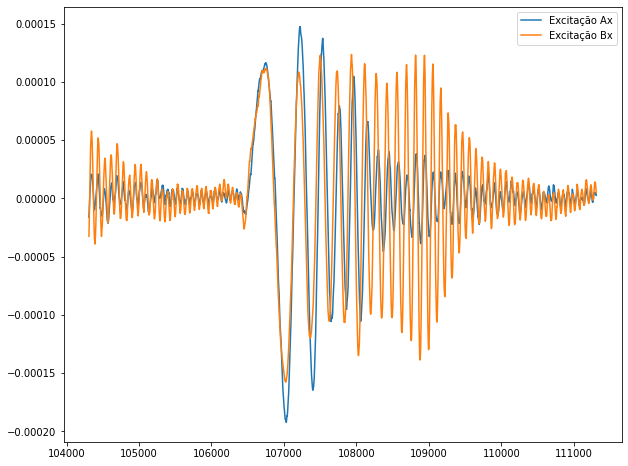

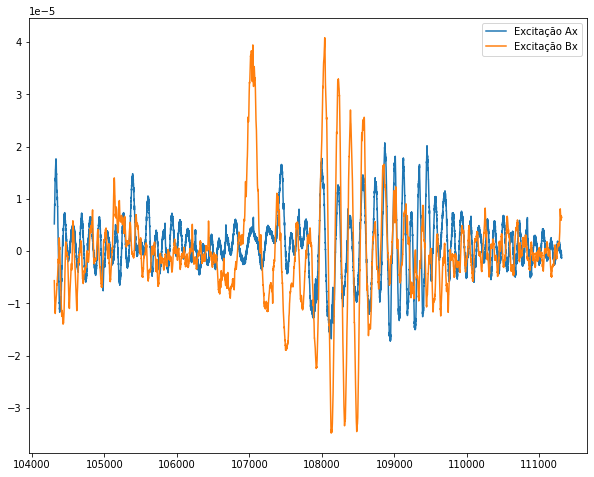

In [15]:
df = dfs[2]
i0 = 7000
i1 = i0 + 7000
plt.figure(figsize=(20,8))
plt.plot(df["f_ax"].iloc[i0:i1], label="Força Ax")
plt.plot(df["f_bx"].iloc[i0:i1], label="Força Bx")
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["e_ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ax"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["bx"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ay"].iloc[i0:i1], label="Excitação Ax")
plt.plot(df["by"].iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

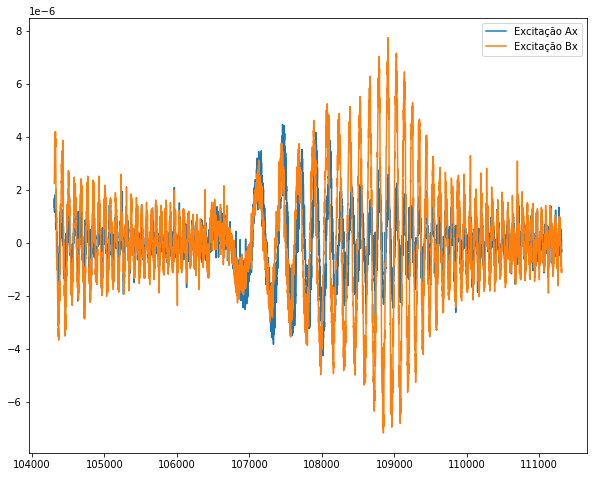

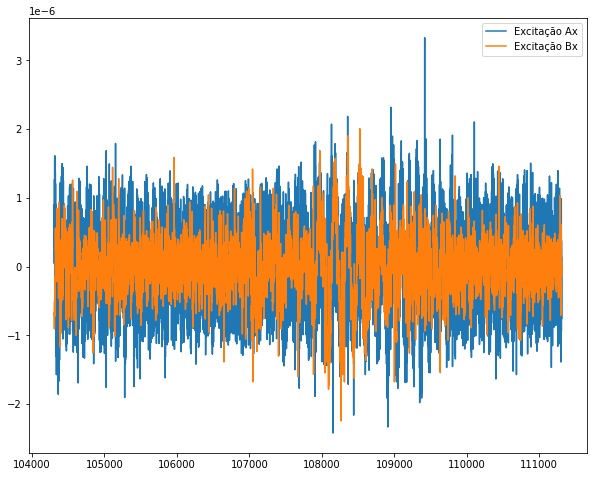

In [16]:
plt.figure(figsize=(10,8))
plt.plot((df["ax"] - df["ax"].shift()).iloc[i0:i1], label="Excitação Ax")
plt.plot((df["bx"] - df["bx"].shift()).iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot((df["ay"] - df["ay"].shift()).iloc[i0:i1], label="Excitação Ax")
plt.plot((df["by"] - df["by"].shift()).iloc[i0:i1], label="Excitação Bx")
plt.legend()
plt.show()

In [17]:


def center_of_mass(df):
    df["f_ay"] -= df["f_ay"].mean()
    df["f_ax"] -= df["f_ax"].mean()
    df["f_bx"] -= df["f_bx"].mean()
    df["f_by"] -= df["f_by"].mean()
    df["x"] = (df["ax"] + df["bx"])/2
    #df["x"] = df["ax"]
    df["y"] = (df["ay"] + df["by"])/2
    #df["y"] = df["ay"]
    df['fx'] = df["f_ax"] + df["f_bx"]
    #df["fx"] = df["f_ax"]
    df['fy'] = df["f_ay"] + df["f_by"]
    return df

dfs = list(map(center_of_mass, dfs))
dfs = list(map(add_derivatives, dfs))

           
df_train = pd.concat([dfs[0], dfs[-1]], ignore_index=True)
df_dev   = dfs[2]

df_train.to_csv("amb_other/sweep_train.csv", index=False)
df_dev.to_csv("amb_other/sweep_test.csv", index=False)

No handles with labels found to put in legend.


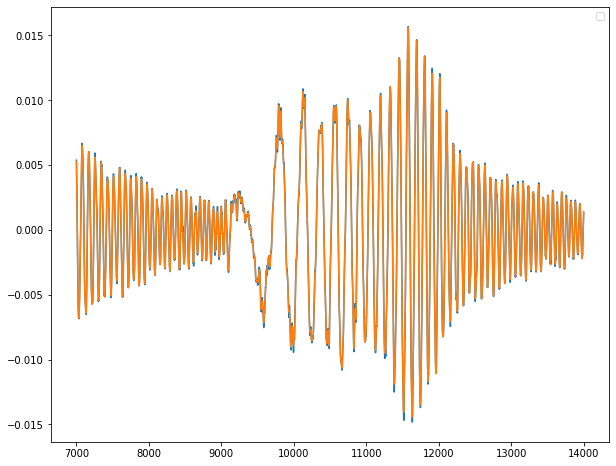

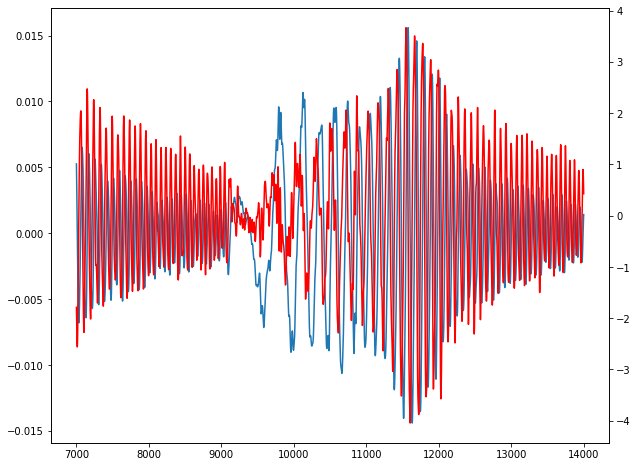

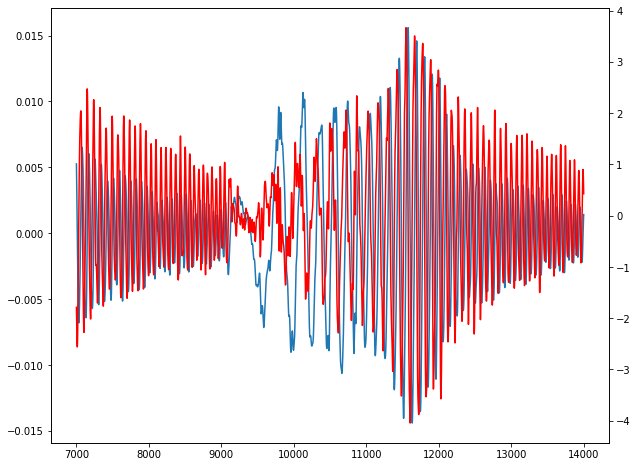

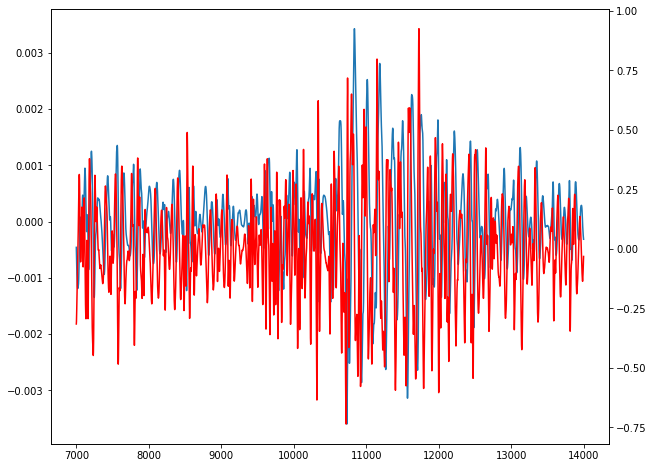

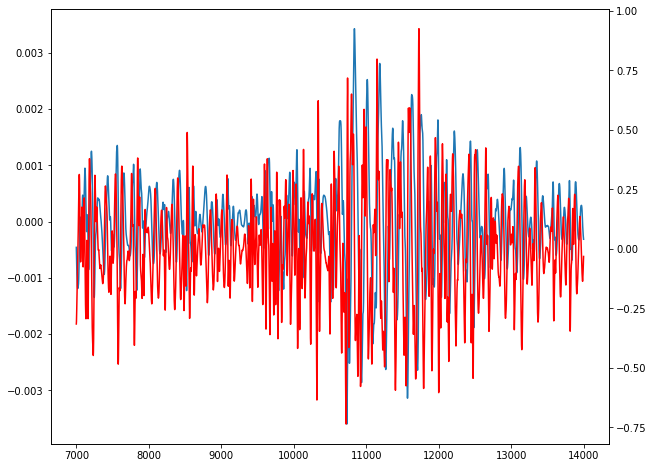

In [12]:
df = df_train
plt.figure(figsize=(10,8))
plt.plot((df["x"] - df["x"].shift()).iloc[i0:i1]/0.000195)
plt.plot(df["x_dot"].iloc[i0:i1])
plt.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(df["x_dot"].iloc[i0:i1])
ax2.plot(df["x_dot2"].iloc[i0:i1], color="red")
fig.show()

fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(df["x_dot"].iloc[i0:i1])
ax2.plot(df["x_dot2"].iloc[i0:i1], color="red")
fig.show()

fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(df["y_dot"].iloc[i0:i1])
ax2.plot(df["y_dot2"].iloc[i0:i1], color="red")
fig.show()

fig, ax1 = plt.subplots(figsize=(10,8))
ax2 = ax1.twinx()
ax1.plot(df["y_dot"].iloc[i0:i1])
ax2.plot(df["y_dot2"].iloc[i0:i1], color="red")
fig.show()
